In [527]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# https://plos.figshare.com/articles/_Eight_Personal_Characteristics_Associated_with_the_Power_to_Live_with_Disasters_as_Indicated_by_Survivors_of_the_2011_Great_East_Japan_Earthquake_Disaster_/1470421

In [14]:
os.getcwd()

'/Users/josephshanks/Downloads'

In [3]:
# https://digital.nhs.uk/data-and-information/publications/statistical/mental-health-of-children-and-young-people-in-england/2017/2017 -----seperate data set that might work


In [17]:
df_agesex=pd.read_excel('S1_File.xlsx', sheet_name='data D')

In [94]:
df_evac_jobs_dmg=pd.read_excel('S1_File.xlsx', sheet_name='data E')

In [98]:
#Reassigning column names to df
df_evac_jobs_dmg.columns = ['ID','Y/N Evacuated', 'Family Inj scale 1-4 5=NA', 'FAIS#2', 'FAIS#3','Drop1','Drop2','Friends Inj scale 1-4 5=NA','FRIS#2', 'FRIS#3','FRIS#4', 'DROP3','Residence DMG','Job affect scale1-4 5=had no job','JAS#2','JAS#3','Drop4','Drop5']

In [140]:
#empty columns - no data
df_evac_jobs_dmg.drop(labels=['Drop1','Drop2','DROP3','Drop4','Drop5'], axis=1, inplace=True)


In [139]:
df_evac_jobs_dmg

,ID,Y/N Evacuated,Family Inj scale 1-4 5=NA,FAIS#2,FAIS#3,Friends Inj scale 1-4 5=NA,FRIS#2,FRIS#3,FRIS#4,Residence DMG,Job affect scale1-4 5=had no job,JAS#2,JAS#3
0,1,2.0,5.0,NaN,NaN,4.0,NaN,NaN,NaN,7.0,1.0,NaN,NaN
1,2,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN
2,3,1.0,1.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,1.0,NaN,NaN
3,4,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,6.0,4.0,NaN,NaN
4,5,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,7.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1408,1.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,7.0,4.0,NaN,NaN
1408,1409,2.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,7.0,1.0,NaN,NaN
1409,1410,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,7.0,4.0,NaN,NaN
1410,1411,1.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,7.0,4.0,NaN,NaN


In [149]:
df_personality=pd.read_excel('S1_File.xlsx', sheet_name='data P')

In [351]:
df_personality.set_index("ID", inplace=True)

KeyError: "None of ['ID'] are in the columns"

In [311]:
print(quartile_personality(df_p_altruism))
print(quartile_personality(df_p_emotional_regulation))
print(quartile_personality(df_p_leadership))
print(quartile_personality(df_p_problem_solving))
print(quartile_personality(df_p_self_improvement))
print(quartile_personality(df_p_self_transcendence))
print(quartile_personality(df_p_stubbornness))
print(quartile_personality(df_p_etiquette))

(Index([1, 2, 4, 5, 6], dtype='object'), array([13., 18.]))
(Index([19, 20, 21, 22], dtype='object'), array([11.75, 15.  ]))
(Index([26, 30, 31, 39, 40], dtype='object'), array([10., 16.]))
(Index([13, 23, 24, 25, 33], dtype='object'), array([14., 19.]))
(Index([34, 35, 36], dtype='object'), array([ 7., 11.]))
(Index([15, 16, 17, 18], dtype='object'), array([12., 16.]))
(Index([8, 7, 9, 11, 12], dtype='object'), array([12., 18.]))
(Index([28, 37, 38], dtype='object'), array([11., 14.]))


In [514]:
#Creating altruism personality group
#Assigning null's as the avg of similiar test questions
df_p_altruism = df_personality[[1,2,4,5,6]]
df_p_altruism = df_p_altruism.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_altruism = df_p_altruism.dropna()
df_p_altruism = df_p_altruism.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_altruism = df_p_altruism.dropna(subset=['Unnamed: 16'])
df_p_altruism.isna().sum()


1              0
2              0
4              0
5              0
6              0
Unnamed: 16    0
dtype: int64

In [428]:
# cols = [col for col in df_p_altruism.columns if type(col) == int]
# cols

In [427]:
# for i in cols:
#     df_p_altruism[i] =  np.where(df_p_altruism[1].isnull(), df_p_altruism['avg'], df_p_altruism[1])
# df_p_altruism.isna().sum()

In [431]:
# test = df_p_stubbornness.copy()
# test = test.apply(lambda x: x.fillna(x.mean()), axis=1)
# test = test.dropna()
# test = test.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
# test = test.dropna(subset=['Unnamed: 16'])
# test


In [464]:
#Creating Stubbornness personality group
df_p_stubbornness = df_personality[[8,7,9,11,12]]
df_p_stubbornness =df_p_stubbornness.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_stubbornness = df_p_stubbornness.dropna()
df_p_stubbornness =df_p_stubbornness.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_stubbornness = df_p_stubbornness.dropna(subset=['Unnamed: 16'])


In [465]:
#Creating Self Transcendence personality group
df_p_self_transcendence = df_personality[[15,16,17,18]]
df_p_self_transcendence = df_p_self_transcendence.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_self_transcendence = df_p_self_transcendence.dropna()
df_p_self_transcendence = df_p_self_transcendence.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_self_transcendence = df_p_self_transcendence.dropna(subset=['Unnamed: 16'])


In [466]:
#Creating Emotional Regulation personality group
df_p_emotional_regulation = df_personality[[19,20,21,22]]
df_p_emotional_regulation = df_p_emotional_regulation.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_emotional_regulation = df_p_emotional_regulation.dropna()
df_p_emotional_regulation =df_p_emotional_regulation.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_emotional_regulation = df_p_emotional_regulation.dropna(subset=['Unnamed: 16'])
df_p_emotional_regulation

,19,20,21,22,Unnamed: 16
ID,,,,,
1,3.0,1.0,2.0,2.0,1.0
2,4.0,3.0,3.0,2.0,0.0
3,3.0,2.0,2.0,2.0,0.0
4,4.0,1.0,3.0,3.0,0.0
5,4.0,3.0,3.0,3.0,0.0
...,...,...,...,...,...
1408,4.0,5.0,5.0,5.0,2.0
1409,3.0,2.0,2.0,2.0,2.0
1410,4.0,3.0,3.0,3.0,2.0


In [467]:
#Creating Problem Solving personality group
df_p_problem_solving = df_personality[[13,23,24,25,33]]
df_p_problem_solving = df_p_problem_solving.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_problem_solving = df_p_problem_solving.dropna()
df_p_problem_solving =df_p_problem_solving.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_problem_solving = df_p_problem_solving.dropna(subset=['Unnamed: 16'])


In [468]:
#Creating Leadership personality group
df_p_leadership = df_personality[[26,30,31,39,40]]
df_p_leadership = df_p_leadership.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_leadership = df_p_leadership.dropna()
df_p_leadership = df_p_leadership.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_leadership = df_p_leadership.dropna(subset=['Unnamed: 16'])

In [469]:
#Creating Self Improvement personality group
df_p_self_improvement = df_personality[[34,35,36]]
df_p_self_improvement = df_p_self_improvement.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_self_improvement = df_p_self_improvement.dropna()
df_p_self_improvement =df_p_self_improvement.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_self_improvement = df_p_self_improvement.dropna(subset=['Unnamed: 16'])

In [470]:
#Creating Etiquette personality group
df_p_etiquette = df_personality[[28,37,38]]
df_p_etiquette = df_p_etiquette.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_etiquette = df_p_etiquette.dropna()
df_p_etiquette = df_p_etiquette.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_etiquette = df_p_etiquette.dropna(subset=['Unnamed: 16'])

In [234]:
#THIS DF ID MATCHES UP WITH INDEX VALUES WHEN CHANGING DONT ADD ONE!!!!

df_imevac_health_domains = pd.read_excel('S1_File.xlsx', sheet_name='data S')
df_imevac_health_domains= df_imevac_health_domains[1:]


In [235]:
#add in place if needed

#df_imevac_health_domains.dropna(axis=1, how='all')

In [167]:
df_imevac_health_domains.set_index("ID", inplace=True)

,Item#,1,2a,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,3,Unnamed: 148,4,Unnamed: 150,5,Unnamed: 152
ID,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,1.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,95,100,2,5,3,1
2.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,20,100,2,2,5,2
3.0,NaN,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,70,100,1,1,1,0
4.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,20,60,1,3,1,3
5.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,60,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,10,50,0,0,0,0
1409.0,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,20,60,1,3,1,3
1410.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,10,50,1,3,1,0


In [509]:
# column of "the degree of which one's own mental stability was affected"
new_df=pd.DataFrame()
df_imevac_health_domains['Unnamed: 16']
new_df['Degree of Mental Struggle'] = df_imevac_health_domains['Unnamed: 16'].dropna()
new_df

,Degree of Mental Struggle
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1408,2.0
1409,2.0
1410,2.0
1411,1.0


In [322]:
#df_p_self_improvement.sum(axis=1).describe()

In [323]:
#np.percentile(df_p_self_improvement.sum(axis=1),[25,75])



In [443]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) <=7]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
18,3.0,2.0,2.0,2.0
71,0.0,2.0,0.0,2.0
78,0.0,2.0,5.0,2.0
82,3.0,1.0,1.0,2.0
97,1.0,2.0,4.0,2.0
...,...,...,...,...
1380,4.0,0.0,0.0,2.0
1388,0.0,2.0,5.0,2.0
1396,2.0,2.0,3.0,2.0


In [444]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) >=11]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
8,4.0,4.0,4.0,2.0
24,3.0,5.0,5.0,2.0
34,5.0,3.0,5.0,2.0
44,4.0,5.0,5.0,2.0
56,4.0,5.0,4.0,2.0
...,...,...,...,...
1299,4.0,4.0,4.0,2.0
1301,3.0,5.0,3.0,2.0
1390,3.0,5.0,3.0,2.0


In [471]:
#This has already been checked for accuracy after I avg'd the nulls and took out nulls. For emotional regulation the 25 percentile is actually an even 12

def quartile_personality(df_p):
    return df_p.columns,np.percentile(df_p.sum(axis=1),[25,75])

In [446]:
#Equal to or greater than 75 percentile of altruism
df_p_altruism[df_p_altruism['Unnamed: 16'] ==2][df_p_altruism[[1,2,4,5,6]].sum(axis=1) >=18]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,1,2,4,5,6,Unnamed: 16
ID,,,,,,
8,4.0,4.0,5.0,5.0,4.0,2.0
24,5.0,4.0,5.0,5.0,5.0,2.0
34,4.0,3.0,3.0,5.0,3.0,2.0
56,5.0,3.0,4.0,3.0,4.0,2.0
68,4.0,4.0,4.0,5.0,4.0,2.0
...,...,...,...,...,...,...
1370,5.0,5.0,0.0,4.0,5.0,2.0
1388,3.0,5.0,2.0,5.0,4.0,2.0
1392,4.0,3.0,1.0,5.0,5.0,2.0


In [447]:
#Equal to or less than 25 percentile
df_p_altruism[df_p_altruism['Unnamed: 16'] ==2][df_p_altruism[[1,2,4,5,6]].sum(axis=1) <=13]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,1,2,4,5,6,Unnamed: 16
ID,,,,,,
40,2.0,2.0,3.0,3.0,1.0,2.0
60,3.0,2.0,3.0,3.0,1.0,2.0
62,2.0,2.0,3.0,2.0,3.0,2.0
71,2.0,0.0,1.0,1.0,4.0,2.0
78,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...
1377,2.0,2.0,3.0,3.0,2.0,2.0
1380,2.0,0.0,0.0,0.0,1.0,2.0
1393,3.0,2.0,1.0,3.0,4.0,2.0


In [448]:
df_p_emotional_regulation[df_p_emotional_regulation['Unnamed: 16'] ==2][df_p_emotional_regulation[[19,20,21,22]].sum(axis=1) <=12]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,19,20,21,22,Unnamed: 16
ID,,,,,
40,2.0,1.0,2.0,2.0,2.0
62,3.0,2.0,2.0,2.0,2.0
71,0.0,0.0,0.0,0.0,2.0
78,1.0,3.0,3.0,3.0,2.0
87,4.0,2.0,3.0,2.0,2.0
...,...,...,...,...,...
1383,3.0,3.0,3.0,2.0,2.0
1388,1.0,0.0,0.0,1.0,2.0
1393,2.0,2.0,2.0,1.0,2.0


In [472]:
df_p_emotional_regulation[df_p_emotional_regulation['Unnamed: 16'] ==2][df_p_emotional_regulation[[19,20,21,22]].sum(axis=1) >=15]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,19,20,21,22,Unnamed: 16
ID,,,,,
24,5.0,3.0,5.0,5.0,2.0
56,5.0,5.0,3.0,4.0,2.0
60,5.0,4.0,3.0,3.0,2.0
68,4.0,4.0,4.0,5.0,2.0
122,3.0,4.0,3.0,5.0,2.0
...,...,...,...,...,...
1297,3.0,5.0,4.0,5.0,2.0
1323,4.0,4.0,3.0,4.0,2.0
1331,3.0,4.0,4.0,4.0,2.0


In [475]:
df_p_leadership[df_p_leadership['Unnamed: 16'] ==2][df_p_leadership[[26, 30, 31, 39, 40]].sum(axis=1) <=10]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,26,30,31,39,40,Unnamed: 16
ID,,,,,,
18,2.0,2.0,2.0,2.0,2.0,2.0
71,1.0,0.0,0.0,0.0,0.0,2.0
94,2.0,3.0,2.0,2.0,0.0,2.0
97,2.0,1.0,1.0,1.0,1.0,2.0
122,4.0,1.0,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1377,2.0,1.0,1.0,3.0,2.0,2.0
1380,3.0,0.0,0.0,1.0,0.0,2.0
1393,3.0,3.0,2.0,1.0,1.0,2.0


In [476]:
df_p_leadership[df_p_leadership['Unnamed: 16'] ==2][df_p_leadership[[26, 30, 31, 39, 40]].sum(axis=1) >=16]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,26,30,31,39,40,Unnamed: 16
ID,,,,,,
8,4.0,3.0,4.0,4.0,4.0,2.0
24,5.0,4.0,4.0,5.0,4.0,2.0
44,3.0,4.0,3.0,5.0,3.0,2.0
56,4.0,3.0,3.0,4.0,4.0,2.0
68,5.0,5.0,5.0,5.0,5.0,2.0
...,...,...,...,...,...,...
1278,5.0,0.0,3.0,5.0,3.0,2.0
1383,3.0,2.0,4.0,3.0,4.0,2.0
1388,5.0,4.0,4.0,5.0,5.0,2.0


In [477]:
df_p_problem_solving[df_p_problem_solving['Unnamed: 16'] ==2][df_p_problem_solving[[13, 23, 24, 25, 33]].sum(axis=1) <=14]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,13,23,24,25,33,Unnamed: 16
ID,,,,,,
18,1.0,3.0,3.0,3.0,2.0,2.0
40,1.0,2.0,2.0,2.0,3.0,2.0
62,3.0,2.0,2.0,2.0,2.0,2.0
71,0.0,0.0,0.0,0.0,3.0,2.0
87,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...
1388,0.0,1.0,2.0,1.0,5.0,2.0
1390,0.0,1.0,5.0,3.0,5.0,2.0
1392,2.0,3.0,3.0,3.0,3.0,2.0


In [479]:
df_p_problem_solving[df_p_problem_solving['Unnamed: 16'] ==2][df_p_problem_solving[[13, 23, 24, 25, 33]].sum(axis=1) >=19]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,13,23,24,25,33,Unnamed: 16
ID,,,,,,
24,5.00,5.0,4.0,5.0,5.0,2.0
56,2.00,5.0,5.0,5.0,4.0,2.0
60,3.00,3.0,4.0,4.0,5.0,2.0
68,3.00,4.0,5.0,5.0,5.0,2.0
78,4.25,3.0,5.0,4.0,5.0,2.0
...,...,...,...,...,...,...
1259,4.00,3.0,4.0,5.0,4.0,2.0
1265,3.00,5.0,5.0,4.0,5.0,2.0
1296,5.00,5.0,5.0,5.0,3.0,2.0


In [480]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) <=7]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
18,3.0,2.0,2.0,2.0
71,0.0,2.0,0.0,2.0
78,0.0,2.0,5.0,2.0
82,3.0,1.0,1.0,2.0
97,1.0,2.0,4.0,2.0
...,...,...,...,...
1380,4.0,0.0,0.0,2.0
1388,0.0,2.0,5.0,2.0
1396,2.0,2.0,3.0,2.0


In [481]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) >=11]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
8,4.0,4.0,4.0,2.0
24,3.0,5.0,5.0,2.0
34,5.0,3.0,5.0,2.0
44,4.0,5.0,5.0,2.0
56,4.0,5.0,4.0,2.0
...,...,...,...,...
1299,4.0,4.0,4.0,2.0
1301,3.0,5.0,3.0,2.0
1390,3.0,5.0,3.0,2.0


In [482]:
df_p_self_transcendence[df_p_self_transcendence['Unnamed: 16'] ==2][df_p_self_transcendence[[15, 16, 17, 18]].sum(axis=1) <=12]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,15,16,17,18,Unnamed: 16
ID,,,,,
44,4.0,2.0,3.0,3.0,2.0
62,2.0,2.0,2.0,2.0,2.0
71,0.0,5.0,0.0,3.0,2.0
95,3.0,3.0,3.0,3.0,2.0
97,2.0,4.0,4.0,2.0,2.0
...,...,...,...,...,...
1331,3.0,3.0,3.0,3.0,2.0
1347,3.0,3.0,3.0,3.0,2.0
1363,3.0,3.0,3.0,3.0,2.0


In [483]:
df_p_self_transcendence[df_p_self_transcendence['Unnamed: 16'] ==2][df_p_self_transcendence[[15, 16, 17, 18]].sum(axis=1) >=16]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,15,16,17,18,Unnamed: 16
ID,,,,,
24,5.0,5.0,5.0,5.0,2.0
56,5.0,4.0,5.0,5.0,2.0
78,5.0,5.0,5.0,5.0,2.0
82,5.0,5.0,4.0,3.0,2.0
87,3.0,5.0,5.0,3.0,2.0
...,...,...,...,...,...
1297,4.0,5.0,5.0,5.0,2.0
1323,3.0,5.0,5.0,5.0,2.0
1390,5.0,5.0,5.0,5.0,2.0


In [484]:
df_p_stubbornness[df_p_stubbornness['Unnamed: 16'] ==2][df_p_stubbornness[[8, 7, 9, 11, 12]].sum(axis=1) <=12]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,8,7,9,11,12,Unnamed: 16
ID,,,,,,
40,2.0,1.0,2.0,1.0,1.0,2.0
78,1.0,1.0,1.0,1.0,1.0,2.0
94,0.0,3.0,0.0,0.0,1.0,2.0
136,1.0,2.0,1.0,0.0,3.0,2.0
170,1.0,1.0,1.0,1.0,3.0,2.0
...,...,...,...,...,...,...
1370,1.0,5.0,5.0,0.0,0.0,2.0
1377,2.0,2.0,2.0,2.0,2.0,2.0
1396,1.0,4.0,3.0,1.0,3.0,2.0


In [485]:
df_p_stubbornness[df_p_stubbornness['Unnamed: 16'] ==2][df_p_stubbornness[[8, 7, 9, 11, 12]].sum(axis=1) >=18]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,8,7,9,11,12,Unnamed: 16
ID,,,,,,
8,2.0,4.0,3.0,4.0,5.0,2.0
24,4.0,4.0,4.0,4.0,4.0,2.0
56,3.0,3.0,4.0,4.0,5.0,2.0
62,4.0,4.0,3.0,4.0,4.0,2.0
71,5.0,0.0,5.0,5.0,5.0,2.0
...,...,...,...,...,...,...
1388,4.0,3.0,3.0,3.0,5.0,2.0
1390,5.0,5.0,5.0,2.0,5.0,2.0
1392,3.0,4.0,4.0,5.0,5.0,2.0


In [486]:
df_p_etiquette[df_p_etiquette['Unnamed: 16'] ==2][df_p_etiquette[[28, 37, 38]].sum(axis=1) <=11]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,28,37,38,Unnamed: 16
ID,,,,
18,3.0,4.0,3.0,2.0
62,3.0,2.0,3.0,2.0
68,5.0,1.0,5.0,2.0
75,3.0,4.0,3.0,2.0
82,3.0,1.0,5.0,2.0
...,...,...,...,...
1377,4.0,3.0,3.0,2.0
1380,3.0,4.0,3.0,2.0
1391,3.0,4.0,4.0,2.0


People who valued  etiquette the least but also scored high in mental trauma from the earthquake

In [488]:
df_p_etiquette[df_p_etiquette['Unnamed: 16'] ==2][df_p_etiquette[[28, 37, 38]].sum(axis=1) >=14]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


115

People who valued  etiquette the most and also scored high in mental trauma from the earthquake

In [ ]:
d=pd.DataFrame({'count':[]}

)

In [64]:
group_sex=df_agesex.groupby('Sex')

In [90]:
# for group in group_sex:
#     print('Group Name: ', group[0])
#     print('Group Data:\n', group[1])
#     print('\n')

In [91]:
# y=df_agesex['Sex']==2

In [286]:
df_agesex[df_agesex['Sex']==2]['Sex'] 

0       2.0
2       2.0
7       2.0
11      2.0
13      2.0
       ... 
1404    2.0
1405    2.0
1407    2.0
1408    2.0
1409    2.0
Name: Sex, Length: 832, dtype: float64

In [ ]:
x = np.arange(

fig, ax = plt.subplots()

bars = ax.bar(x, record_counts['count'])
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(record_counts['genre'])

In [519]:
def histogram_maker(df):
    cols = [col for col in df.columns if type(col) == int]
    return df[cols].sum(axis=1)

histogram_maker(df_p_leadership).isna().sum()

0

In [504]:
df_df = pd.DataFrame()

In [520]:
df_df['etiquette'] = histogram_maker(df_p_etiquette)
df_df['altruism'] = histogram_maker(df_p_altruism)
df_df['emotional regulation'] = histogram_maker(df_p_emotional_regulation)
df_df['leadership'] = histogram_maker(df_p_leadership)
df_df['problem solving'] = histogram_maker(df_p_problem_solving)
df_df['self improvement'] = histogram_maker(df_p_self_improvement)
df_df['self transcendence'] = histogram_maker(df_p_self_transcendence)
df_df['stubbornness'] = histogram_maker(df_p_stubbornness)
df_df['Degree of mental struggle'] = new_df['Degree of Mental Struggle']
df_df.isna().sum(axis=1)

ID
1       0
2       0
3       0
4       0
5       0
       ..
1408    0
1409    0
1410    0
1411    0
1412    0
Length: 1311, dtype: int64

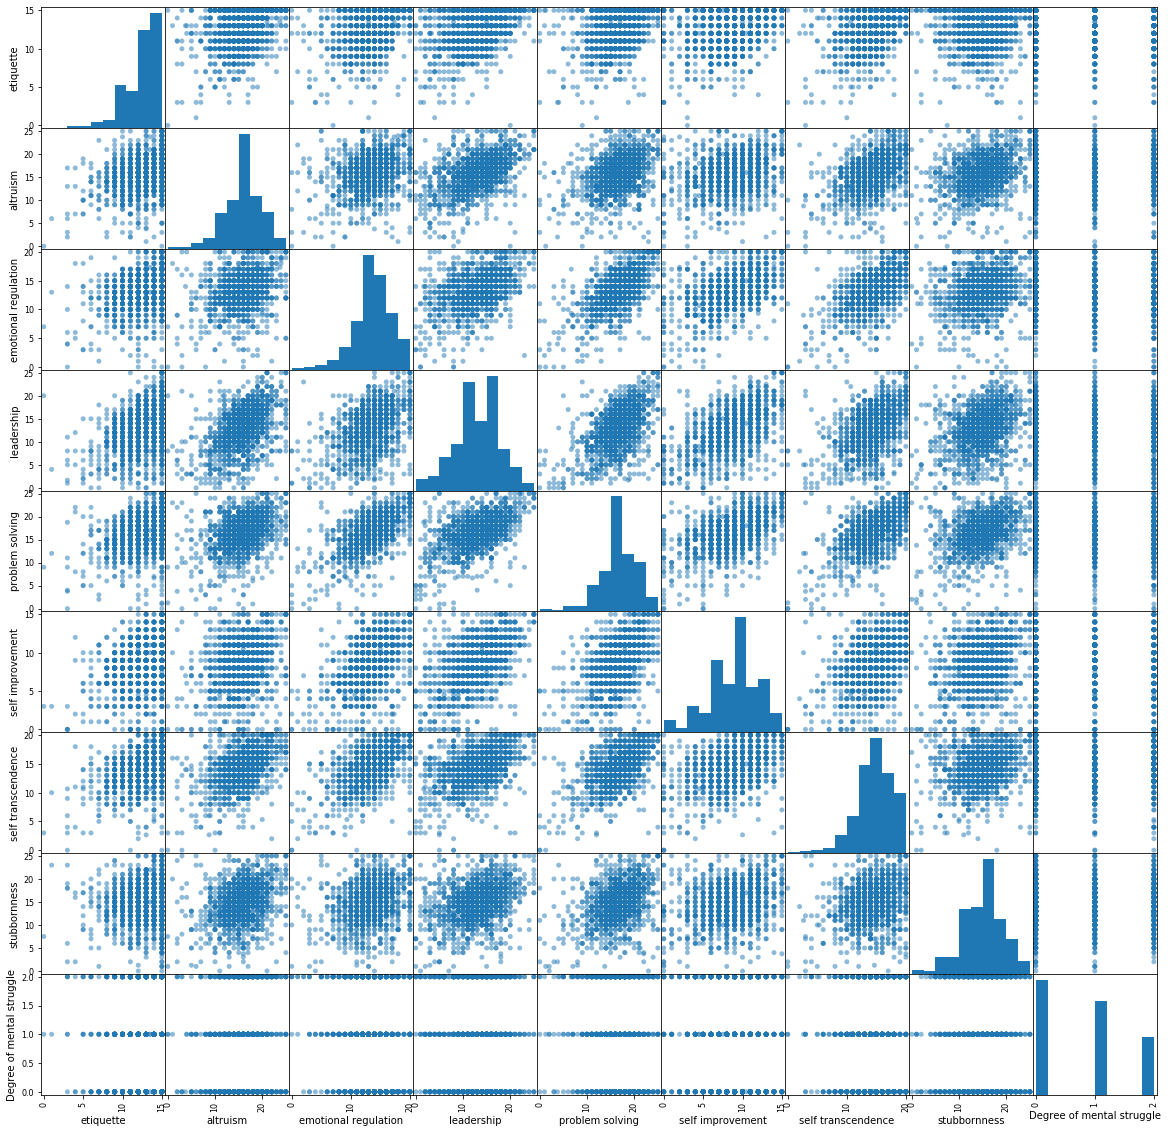

In [526]:
pd.plotting.scatter_matrix(df_df, figsize=(20, 20), s=100);

In [ ]:
sns.stripplot(data=df_frog,
              x='ID',
              y='impact force (mN)',
              jitter=True);

# State a scientific yes/no question



#### Do People in the > Q3 of active self improvement have less change in mental stability than people in <Q1 of active self improvement?

# Take a skeptical stance: state a null hypothesis

#### People in Q1 of active self improvement had no decline in mental stability during the earthquake compared to those in Q3 of self-improvement


$$ p_1 = P(\text{Victim expierenced "very much" trouble to their mental stability}) $$
$$ p_3 = P(\text{Victim expierenced "very much" trouble to their mental stability}) $$


$$ H_0: \ p_3 \leq p_1 $$


$$ p_H = P(\text{The degree of affect of mental stablity caused by the earthquake is lower-on avg-}) $$

# State the opposite of your null hypothesis: the alternative hypothesis

#### People with low levels of active self improvement did expierence a decline in mental stability during the earthquake compare to those who have high levels of active self improvement

# Create a probabilistic model of the situation when the null is true

\begin{align} \newcommand{\nor}{\text{N}}
\text{# of people in Q3 who expierenced "very much" trouble to their mental stability} &\approx \nor(78p_M, \sqrt{78p_M(1-p_M)}\,) \\
\text{# of people in Q1 who expierenced "very much" trouble to their mental stability} &\approx \nor(103p_N, \sqrt{103p_N(1-p_N)}\,) 
\end{align}